<a href="https://colab.research.google.com/github/matteods96/Amazon-Appliances-Products-Reliability-User-Behavior-Detection/blob/main/34269_Face_Recognition_DL_PretrainedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries needed**

In [7]:
import kagglehub
import shutil
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
! pip install onnx
! pip install onnxruntime
!pip install onnx2torch

! pip install onnxruntime-gpu
import onnx
from onnx2torch import convert
import onnx
from onnx2torch import convert
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
# Install correct versions
!pip install --quiet onnx onnx2torch torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Restart runtime after this cell before continuing



**Downloading the original dateset from Kaggle API**

In [8]:


# Downloading latest version of VGGFace2 dataset from KaggleHub
path = kagglehub.dataset_download("hearfool/vggface2")
print("Downloaded to:", path)

# Moving a  dataset to Colab-visible directory
visible_path = '/content/vggface2'

if not os.path.exists(visible_path):
    shutil.copytree(path, visible_path)
    print(f"Copied dataset to {visible_path}")
else:
    print(f"Dataset already exists at {visible_path}")






Downloaded to: /kaggle/input/vggface2
Dataset already exists at /content/vggface2


**Eliminating train/val Folders to Retain Only Class-Based Image Folders**

In [ ]:
import os
import shutil

# Set your base directory (the one containing 'train' and 'val')
base_dir = '/content/vggface2/'  # or set manually like '/path/to/vggface2'
print(base_dir)
for folder in ['train', 'val']:
    folder_path = os.path.join(base_dir, folder)

    for item in os.listdir(folder_path):
        src = os.path.join(folder_path, item)
        dst = os.path.join(base_dir, item)
        shutil.move(src, dst)
        print(f"Moved '{src}' to '{dst}'")

    # Remove the empty folder after moving its contents
    shutil.rmtree(folder_path)
    print(f"Removed folder '{folder_path}'")


**Counting number of folders and images files in the original data source**

In [11]:
# Count number of folders (classes) and image files
folder_count = 0
file_count = 0

for root, dirs, files in os.walk(visible_path):

    # Only count folders that directly contain images
    if any(file.lower().endswith(('.jpg')) for file in files):
        folder_count += 1
        file_count += len(files)

print(f"Number of folders: {folder_count}")
print(f"Total number of image files: {file_count}")


Number of folders: 540
Total number of image files: 197693


**Renaming the images with their folder they belonged to( representing the individuals followed by + and  the name of the file) for better tracking of the files and storing into a dictionary the new name of the images and their respective folder(representing a specific individual)**

In [ ]:
import os

base_dir = '/content/vggface2'  # Change this to your folder path

filename_to_folder = {}

for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    if not os.path.isdir(folder_path):
        continue

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            new_name = f"{folder_name}+{filename}"
            new_path = os.path.join(folder_path, new_name)

            os.rename(file_path, new_path)
            filename_to_folder[new_name] = folder_name
            print(f"Renamed {filename} to {new_name}")

# Example: print dictionary entries
print("\nSample first 5 entries of the dictionary having as keys the name of the images and as values the number the folder they belong :")
for k, v in list(filename_to_folder.items())[:5]:
    print(f"{k} -> {v}")



**Save folder of the dataset modified in Google Drive**

**Preprocessing the data**

In [13]:
# Preprocessing steps
transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])



**Using a data loader for the dataset**

In [14]:
# Loading dataset
visible_path = '/content/vggface2'

dataset = datasets.ImageFolder(root=visible_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Previewing one batch
for images, labels in dataloader:
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    break


Image batch shape: torch.Size([32, 3, 112, 112])
Label batch shape: torch.Size([32])


In [15]:
print(dataset.classes)# List of class folder names
num_classes=len(dataset.classes)
print('Number of classes is: ',num_classes)


['n000001', 'n000002', 'n000003', 'n000004', 'n000005', 'n000006', 'n000007', 'n000008', 'n000009', 'n000010', 'n000011', 'n000012', 'n000013', 'n000014', 'n000015', 'n000016', 'n000017', 'n000018', 'n000019', 'n000020', 'n000021', 'n000022', 'n000023', 'n000024', 'n000025', 'n000026', 'n000027', 'n000028', 'n000029', 'n000030', 'n000031', 'n000032', 'n000033', 'n000034', 'n000035', 'n000036', 'n000037', 'n000038', 'n000039', 'n000040', 'n000041', 'n000042', 'n000043', 'n000044', 'n000045', 'n000046', 'n000047', 'n000048', 'n000049', 'n000050', 'n000051', 'n000052', 'n000053', 'n000054', 'n000055', 'n000056', 'n000057', 'n000058', 'n000059', 'n000060', 'n000061', 'n000062', 'n000063', 'n000064', 'n000065', 'n000066', 'n000067', 'n000068', 'n000069', 'n000070', 'n000071', 'n000072', 'n000073', 'n000074', 'n000075', 'n000076', 'n000077', 'n000078', 'n000079', 'n000080', 'n000081', 'n000082', 'n000083', 'n000084', 'n000085', 'n000086', 'n000087', 'n000088', 'n000089', 'n000090', 'n000091'

In [16]:
from torch.utils.data import random_split, DataLoader

# Define split sizes
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # 20% for testing

# Split the dataset
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


In [17]:
for images, labels in test_loader:
    print("Test Image batch shape:", images.shape)
    print("Test Label batch shape:", labels.shape)
    break


Test Image batch shape: torch.Size([32, 3, 112, 112])
Test Label batch shape: torch.Size([32])


**Setup device (CPU or GPU)**

In [18]:
#  Setup device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [19]:
torch.cuda.memory_summary(device=device)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [20]:
import gc
gc.collect()
torch.cuda.empty_cache()


**Installing and importing libraries needed to load and use pretrained model in .onnx format**

**Implementation of ArcFace Margin Layer for the losss( references https://github.com/HaiyuWu/SOTA-Face-Recognition-Train-and-Test/blob/main/losses.py)**

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.notebook import tqdm
import pandas as pd

class ArcFace(nn.Module):
    def __init__(self, feature_in=512, feature_out=540, margin=0.3, scale = 64):
        super().__init__()
        self.feature_in = feature_in
        self.feature_out = feature_out
        self.scale = scale
        self.margin = margin

        self.weights = nn.Parameter(torch.FloatTensor(feature_out,feature_in))
        nn.init.xavier_normal_(self.weights)
    def forward(self, features, targets):
        cos_theta = F.linear(features, F.normalize(self.weights), bias=None)
        cos_theta = cos_theta.clip(-1+1e-7, 1-1e-7)

        arc_cos = torch.acos(cos_theta)
        M = F.one_hot(targets, num_classes = self.feature_out) * self.margin
        arc_cos += M

        cos_theta_2 = torch.cos(arc_cos)
        logits = cos_theta_2 * self.scale
        return logits


**Converting the onnnx model into a Pytorch model for fine-tuning purposes**

In [22]:
# Load ONNX model
onnx_model_path = "glint360k_r50.onnx"
onnx_model = onnx.load(onnx_model_path)

# Convert to PyTorch model
torch_model = convert(onnx_model)

for name, module in torch_model.named_modules():
    print(f"{name}: {module}")




: GraphModule(
  (Conv_0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (initializers): Module()
  (PRelu_1): OnnxPReLU()
  (BatchNormalization_2): BatchNorm2d(64, eps=9.999999747378752e-06, momentum=0.10000002384185791, affine=True, track_running_stats=True)
  (Conv_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (PRelu_4): OnnxPReLU()
  (Conv_5): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (Conv_6): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2))
  (Add_7): OnnxBinaryMathOperation()
  (BatchNormalization_8): BatchNorm2d(64, eps=9.999999747378752e-06, momentum=0.10000002384185791, affine=True, track_running_stats=True)
  (Conv_9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (PRelu_10): OnnxPReLU()
  (Conv_11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (Add_12): OnnxBinaryMathOperation()
  (BatchNormalization_13): BatchNorm2d(64, eps=9.999999747378752e-06, momentum=

In [23]:
import torch
dummy_input = torch.randn(2, 3, 112, 112)  # Adjust shape if needed
output = torch_model(dummy_input)
print(output.shape)  # Should be [1, 512]


torch.Size([2, 512])


In [24]:
for name, module in torch_model.named_modules():
    if hasattr(module, 'out_features'):
        print(f"{name}: {module.out_features}")
    elif hasattr(module, 'out_channels'):
        print(f"{name}: {module.out_channels}")


Conv_0: 64
Conv_3: 64
Conv_5: 64
Conv_6: 64
Conv_9: 64
Conv_11: 64
Conv_14: 64
Conv_16: 64
Conv_19: 128
Conv_21: 128
Conv_22: 128
Conv_25: 128
Conv_27: 128
Conv_30: 128
Conv_32: 128
Conv_35: 128
Conv_37: 128
Conv_40: 256
Conv_42: 256
Conv_43: 256
Conv_46: 256
Conv_48: 256
Conv_51: 256
Conv_53: 256
Conv_56: 256
Conv_58: 256
Conv_61: 256
Conv_63: 256
Conv_66: 256
Conv_68: 256
Conv_71: 256
Conv_73: 256
Conv_76: 256
Conv_78: 256
Conv_81: 256
Conv_83: 256
Conv_86: 256
Conv_88: 256
Conv_91: 256
Conv_93: 256
Conv_96: 256
Conv_98: 256
Conv_101: 256
Conv_103: 256
Conv_106: 256
Conv_108: 256
Conv_111: 512
Conv_113: 512
Conv_114: 512
Conv_117: 512
Conv_119: 512
Conv_122: 512
Conv_124: 512
Gemm_128: 512


In [25]:
pretrained_model=torch_model

**Integrating Pretrained model with Arcface Loss**

In [26]:
from collections import OrderedDict
import torch.nn as nn
import torch
import torch.nn as nn
import torch.nn.functional as F

class PretrainedWithArcFace(nn.Module):
    def __init__(self, pretrained_model, feature_in=512, num_classes=540, margin=0.3, scale=64):
        super().__init__()
        self.backbone = pretrained_model
        self.arcface = ArcFace(feature_in=feature_in, feature_out=num_classes, margin=margin, scale=scale)

    def forward(self, x, target=None):
        # Get embeddings from pretrained model
        embeddings = self.backbone(x)

        # Normalize embeddings
        embeddings = F.normalize(embeddings, dim=1)

        if target is not None:
            # Training mode: pass through ArcFace to get logits
            logits = self.arcface(embeddings, target)
            return logits

        # Inference mode: just return normalized embeddings
        return embeddings


In [28]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = PretrainedWithArcFace(
    pretrained_model=pretrained_model,  # your base model
    feature_in=512,
    num_classes=540,
    margin=0.3,
    scale=64
).to(DEVICE)
for name, module in model.named_modules():
    print(f"{name}: {module}")



: PretrainedWithArcFace(
  (backbone): GraphModule(
    (Conv_0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (initializers): Module()
    (PRelu_1): OnnxPReLU()
    (BatchNormalization_2): BatchNorm2d(64, eps=9.999999747378752e-06, momentum=0.10000002384185791, affine=True, track_running_stats=True)
    (Conv_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (PRelu_4): OnnxPReLU()
    (Conv_5): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (Conv_6): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2))
    (Add_7): OnnxBinaryMathOperation()
    (BatchNormalization_8): BatchNorm2d(64, eps=9.999999747378752e-06, momentum=0.10000002384185791, affine=True, track_running_stats=True)
    (Conv_9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (PRelu_10): OnnxPReLU()
    (Conv_11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (Add_12): OnnxBinaryMathOperation()
    (BatchNorm

In [29]:
# Choose how many layers to unfreeze
N = 6  # Last 6 layers

# Get all named parameters as a list
params = list(model.named_parameters())
print(len(params))
# Loop through with indexing
for idx, (name, param) in enumerate(params):
    if idx >= len(params) - N:
        param.requires_grad = True  # Enable training for last N layers
    else:
        param.requires_grad = False  # Freeze earlier layers


161


In [30]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [31]:
@torch.no_grad()
def accuracy(logits, targets):
    return (logits.argmax(1) == targets).float().mean().item()

def train_epoch(loader):
    model.train()
    total_loss, total_acc = 0.0, 0.0

    for X, y in loader:
        X, y = X.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()

        logits = model(X, target=y)
        loss = criterion(logits, y)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_acc += accuracy(logits, y)

    n = len(loader)
    return total_loss / n, total_acc / n


In [32]:
EPOCHS = 5
for epoch in range(1, EPOCHS + 1):
    trn_loss, trn_acc = train_epoch(train_loader)
    print(f"Epoch {epoch:>2}: loss={trn_loss:.4f}, acc={trn_acc:.2%}")


Epoch  1: loss=15.0449, acc=10.93%
Epoch  2: loss=9.0446, acc=26.17%
Epoch  3: loss=6.9361, acc=33.23%
Epoch  4: loss=5.5980, acc=38.45%
Epoch  5: loss=4.6436, acc=42.59%


correct 10110
total 39539
Test Accuracy: 25.57%
Rank-1 Accuracy: 25.57%
Rank-2 Accuracy: 31.48%
Rank-3 Accuracy: 34.79%
Rank-4 Accuracy: 37.33%
Rank-5 Accuracy: 39.29%
Mean Average Precision (mAP): 4.84%


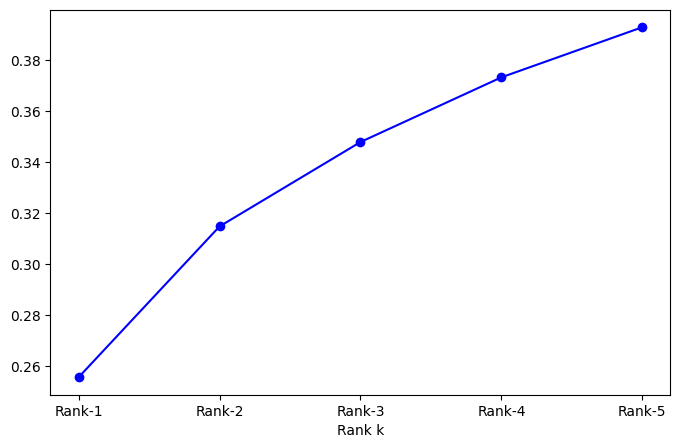

In [34]:
# Evaluation
model.eval()
correct = 0
total = 0
all_logits = []
all_labels = []

with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(DEVICE), y.to(DEVICE)
        logits = model(X, target=y)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)
        all_logits.append(logits.cpu())
        all_labels.append(y.cpu())

print('correct', correct)
print('total', total)
print(f"Test Accuracy: {correct / total:.2%}")

# ---- Rank-1 to Rank-5 Accuracy ---- #
import torch.nn.functional as F

logits_tensor = torch.cat(all_logits)
labels_tensor = torch.cat(all_labels)

rank_accuracies = {}
for k in range(1, 6):
    # Top-k indices for each sample
    topk_preds = torch.topk(logits_tensor, k=k, dim=1).indices
    # Compare if true label is in the top-k predictions
    match_array = topk_preds.eq(labels_tensor.unsqueeze(1))
    rank_k_correct = match_array.any(dim=1).float().sum().item()
    rank_accuracies[f"Rank-{k}"] = rank_k_correct / labels_tensor.size(0)

# Print Rank-k Accuracies
for k, acc in rank_accuracies.items():
    print(f"{k} Accuracy: {acc:.2%}")

def plot_cmc_curve(rank_accuracies):
    ranks = list(rank_accuracies.keys())
    accuracies = list(rank_accuracies.values())

    plt.figure(figsize=(8, 5))
    plt.plot(ranks, accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel('Rank k')

plot_cmc_curve(rank_accuracies)
def compute_mean_average_precision(logits, labels):
    """Compute mean Average Precision (mAP) for classification."""
    num_samples = labels.size(0)
    average_precisions = []

    for i in range(num_samples):
        scores = logits[i]
        true_label = labels[i]
        sorted_indices = torch.argsort(scores, descending=True)
        sorted_labels = labels[sorted_indices]
        matches = (sorted_labels == true_label).float()

        num_relevant = matches.sum().item()
        if num_relevant == 0:
            average_precisions.append(0.0)
            continue

        cum_matches = torch.cumsum(matches, dim=0)
        ranks = torch.arange(1, len(matches) + 1).float()
        precisions = cum_matches / ranks
        ap = (precisions * matches).sum() / num_relevant
        average_precisions.append(ap.item())
        return sum(average_precisions) / len(average_precisions)


# mAP Computation
map_score = compute_mean_average_precision(logits_tensor, labels_tensor)
print(f"Mean Average Precision (mAP): {map_score:.2%}")

**Enhancing the accuracy by increasing number of unfrozen layers of the pretrained model(unfrozen the last 15 layers)**

In [35]:
# Choose how many layers to unfreeze
N = 15  # Last 15 layers

# Get all named parameters as a list
params = list(model.named_parameters())
print(len(params))
# Loop through with indexing
for idx, (name, param) in enumerate(params):
    if idx >= len(params) - N:
        param.requires_grad = True  # Enable training for last N layers
    else:
        param.requires_grad = False  # Freeze earlier layers

161


In [36]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 5
for epoch in range(1, EPOCHS + 1):
    trn_loss, trn_acc = train_epoch(train_loader)
    print(f"Epoch {epoch:>2}: loss={trn_loss:.4f}, acc={trn_acc:.2%}")


Epoch  1: loss=8.2690, acc=22.12%
Epoch  2: loss=7.2407, acc=28.39%
Epoch  3: loss=6.5760, acc=31.26%
Epoch  4: loss=6.0661, acc=33.18%
Epoch  5: loss=5.6718, acc=34.72%


correct 6
total 39539
Test Accuracy: 0.02%
Rank-1 Accuracy: 0.02%
Rank-2 Accuracy: 0.05%
Rank-3 Accuracy: 0.11%
Rank-4 Accuracy: 0.13%
Rank-5 Accuracy: 0.18%
Mean Average Precision (mAP): 4.43%


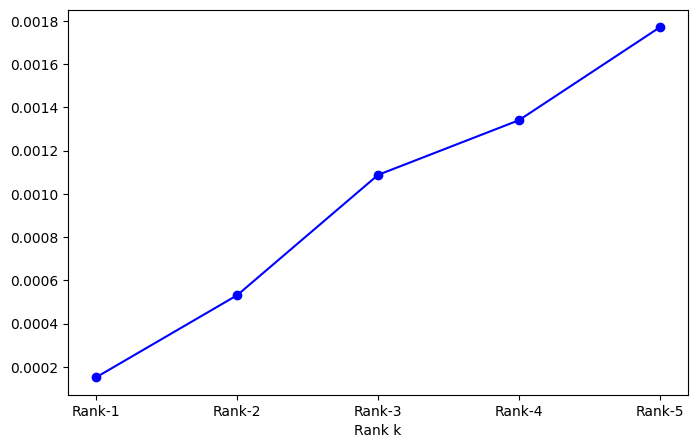

In [38]:
# Evaluation
model.eval()
correct = 0
total = 0
all_logits = []
all_labels = []

with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(DEVICE), y.to(DEVICE)
        logits = model(X, target=y)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)
        all_logits.append(logits.cpu())
        all_labels.append(y.cpu())

print('correct', correct)
print('total', total)
print(f"Test Accuracy: {correct / total:.2%}")

# ---- Rank-1 to Rank-5 Accuracy ---- #
import torch.nn.functional as F

logits_tensor = torch.cat(all_logits)
labels_tensor = torch.cat(all_labels)

rank_accuracies = {}
for k in range(1, 6):
    # Top-k indices for each sample
    topk_preds = torch.topk(logits_tensor, k=k, dim=1).indices
    # Compare if true label is in the top-k predictions
    match_array = topk_preds.eq(labels_tensor.unsqueeze(1))
    rank_k_correct = match_array.any(dim=1).float().sum().item()
    rank_accuracies[f"Rank-{k}"] = rank_k_correct / labels_tensor.size(0)

# Print Rank-k Accuracies
for k, acc in rank_accuracies.items():
    print(f"{k} Accuracy: {acc:.2%}")

def plot_cmc_curve(rank_accuracies):
    ranks = list(rank_accuracies.keys())
    accuracies = list(rank_accuracies.values())

    plt.figure(figsize=(8, 5))
    plt.plot(ranks, accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel('Rank k')

plot_cmc_curve(rank_accuracies)
def compute_mean_average_precision(logits, labels):
    """Compute mean Average Precision (mAP) for classification."""
    num_samples = labels.size(0)
    average_precisions = []

    for i in range(num_samples):
        scores = logits[i]
        true_label = labels[i]
        sorted_indices = torch.argsort(scores, descending=True)
        sorted_labels = labels[sorted_indices]
        matches = (sorted_labels == true_label).float()

        num_relevant = matches.sum().item()
        if num_relevant == 0:
            average_precisions.append(0.0)
            continue

        cum_matches = torch.cumsum(matches, dim=0)
        ranks = torch.arange(1, len(matches) + 1).float()
        precisions = cum_matches / ranks
        ap = (precisions * matches).sum() / num_relevant
        average_precisions.append(ap.item())
        return sum(average_precisions) / len(average_precisions)


# mAP Computation
map_score = compute_mean_average_precision(logits_tensor, labels_tensor)
print(f"Mean Average Precision (mAP): {map_score:.2%}")

**Exploring accuracy by decreasing number of unfrozen layers of the pretrained model(unfrozen the last 3 layers)**

In [39]:
# Choose how many layers to unfreeze
N = 3  # Last 3 layers

# Get all named parameters as a list
params = list(model.named_parameters())
print(len(params))
# Loop through with indexing
for idx, (name, param) in enumerate(params):
    if idx >= len(params) - N:
        param.requires_grad = True  # Enable training for last N layers
    else:
        param.requires_grad = False  # Freeze earlier layers

161


In [40]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 5
for epoch in range(1, EPOCHS + 1):
    trn_loss, trn_acc = train_epoch(train_loader)
    print(f"Epoch {epoch:>2}: loss={trn_loss:.4f}, acc={trn_acc:.2%}")

Epoch  1: loss=4.1379, acc=44.80%
Epoch  2: loss=4.0521, acc=45.34%
Epoch  3: loss=4.0359, acc=45.40%
Epoch  4: loss=4.0169, acc=45.52%
Epoch  5: loss=4.0116, acc=45.64%


correct 9093
total 39539
Test Accuracy: 23.00%
Rank-1 Accuracy: 23.00%
Rank-2 Accuracy: 28.59%
Rank-3 Accuracy: 32.02%
Rank-4 Accuracy: 34.51%
Rank-5 Accuracy: 36.50%
Mean Average Precision (mAP): 6.08%


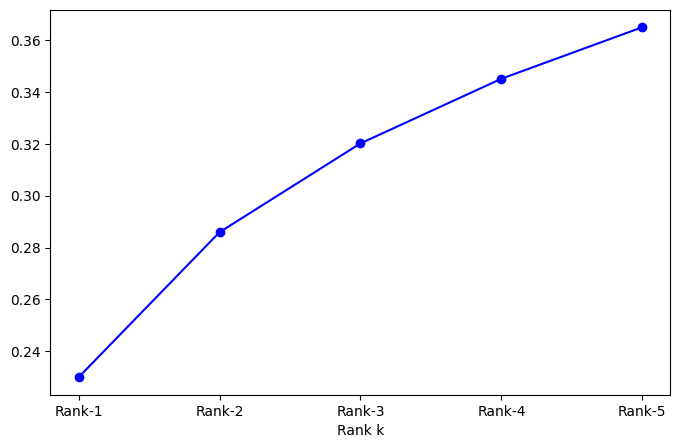

In [42]:
# Evaluation
model.eval()
correct = 0
total = 0
all_logits = []
all_labels = []

with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(DEVICE), y.to(DEVICE)
        logits = model(X, target=y)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)
        all_logits.append(logits.cpu())
        all_labels.append(y.cpu())

print('correct', correct)
print('total', total)
print(f"Test Accuracy: {correct / total:.2%}")

# ---- Rank-1 to Rank-5 Accuracy ---- #
import torch.nn.functional as F

logits_tensor = torch.cat(all_logits)
labels_tensor = torch.cat(all_labels)

rank_accuracies = {}
for k in range(1, 6):
    # Top-k indices for each sample
    topk_preds = torch.topk(logits_tensor, k=k, dim=1).indices
    # Compare if true label is in the top-k predictions
    match_array = topk_preds.eq(labels_tensor.unsqueeze(1))
    rank_k_correct = match_array.any(dim=1).float().sum().item()
    rank_accuracies[f"Rank-{k}"] = rank_k_correct / labels_tensor.size(0)

# Print Rank-k Accuracies
for k, acc in rank_accuracies.items():
    print(f"{k} Accuracy: {acc:.2%}")

def plot_cmc_curve(rank_accuracies):
    ranks = list(rank_accuracies.keys())
    accuracies = list(rank_accuracies.values())

    plt.figure(figsize=(8, 5))
    plt.plot(ranks, accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel('Rank k')

plot_cmc_curve(rank_accuracies)
def compute_mean_average_precision(logits, labels):
    """Compute mean Average Precision (mAP) for classification."""
    num_samples = labels.size(0)
    average_precisions = []

    for i in range(num_samples):
        scores = logits[i]
        true_label = labels[i]
        sorted_indices = torch.argsort(scores, descending=True)
        sorted_labels = labels[sorted_indices]
        matches = (sorted_labels == true_label).float()

        num_relevant = matches.sum().item()
        if num_relevant == 0:
            average_precisions.append(0.0)
            continue

        cum_matches = torch.cumsum(matches, dim=0)
        ranks = torch.arange(1, len(matches) + 1).float()
        precisions = cum_matches / ranks
        ap = (precisions * matches).sum() / num_relevant
        average_precisions.append(ap.item())
        return sum(average_precisions) / len(average_precisions)


# mAP Computation
map_score = compute_mean_average_precision(logits_tensor, labels_tensor)
print(f"Mean Average Precision (mAP): {map_score:.2%}")